# Sim Result: Artificial Clock with different clock rate on RL Controller

[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_24_clock_rate_100_clockfactor_1.0_recordtime_400.0_2021-11-22-19-37-45 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/sparkle_n_24_clock_rate_100_clockfactor_0.5_recordtime_400.0_2021-11-22-01-04-52 already exists. Not creating.


/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_Sparkle-NoGUI.py:89: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_Sparkle-NoGUI.py:144: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_Sparkle-NoGUI.py:165: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_Sparkle-NoGUI.py:213: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_Spar

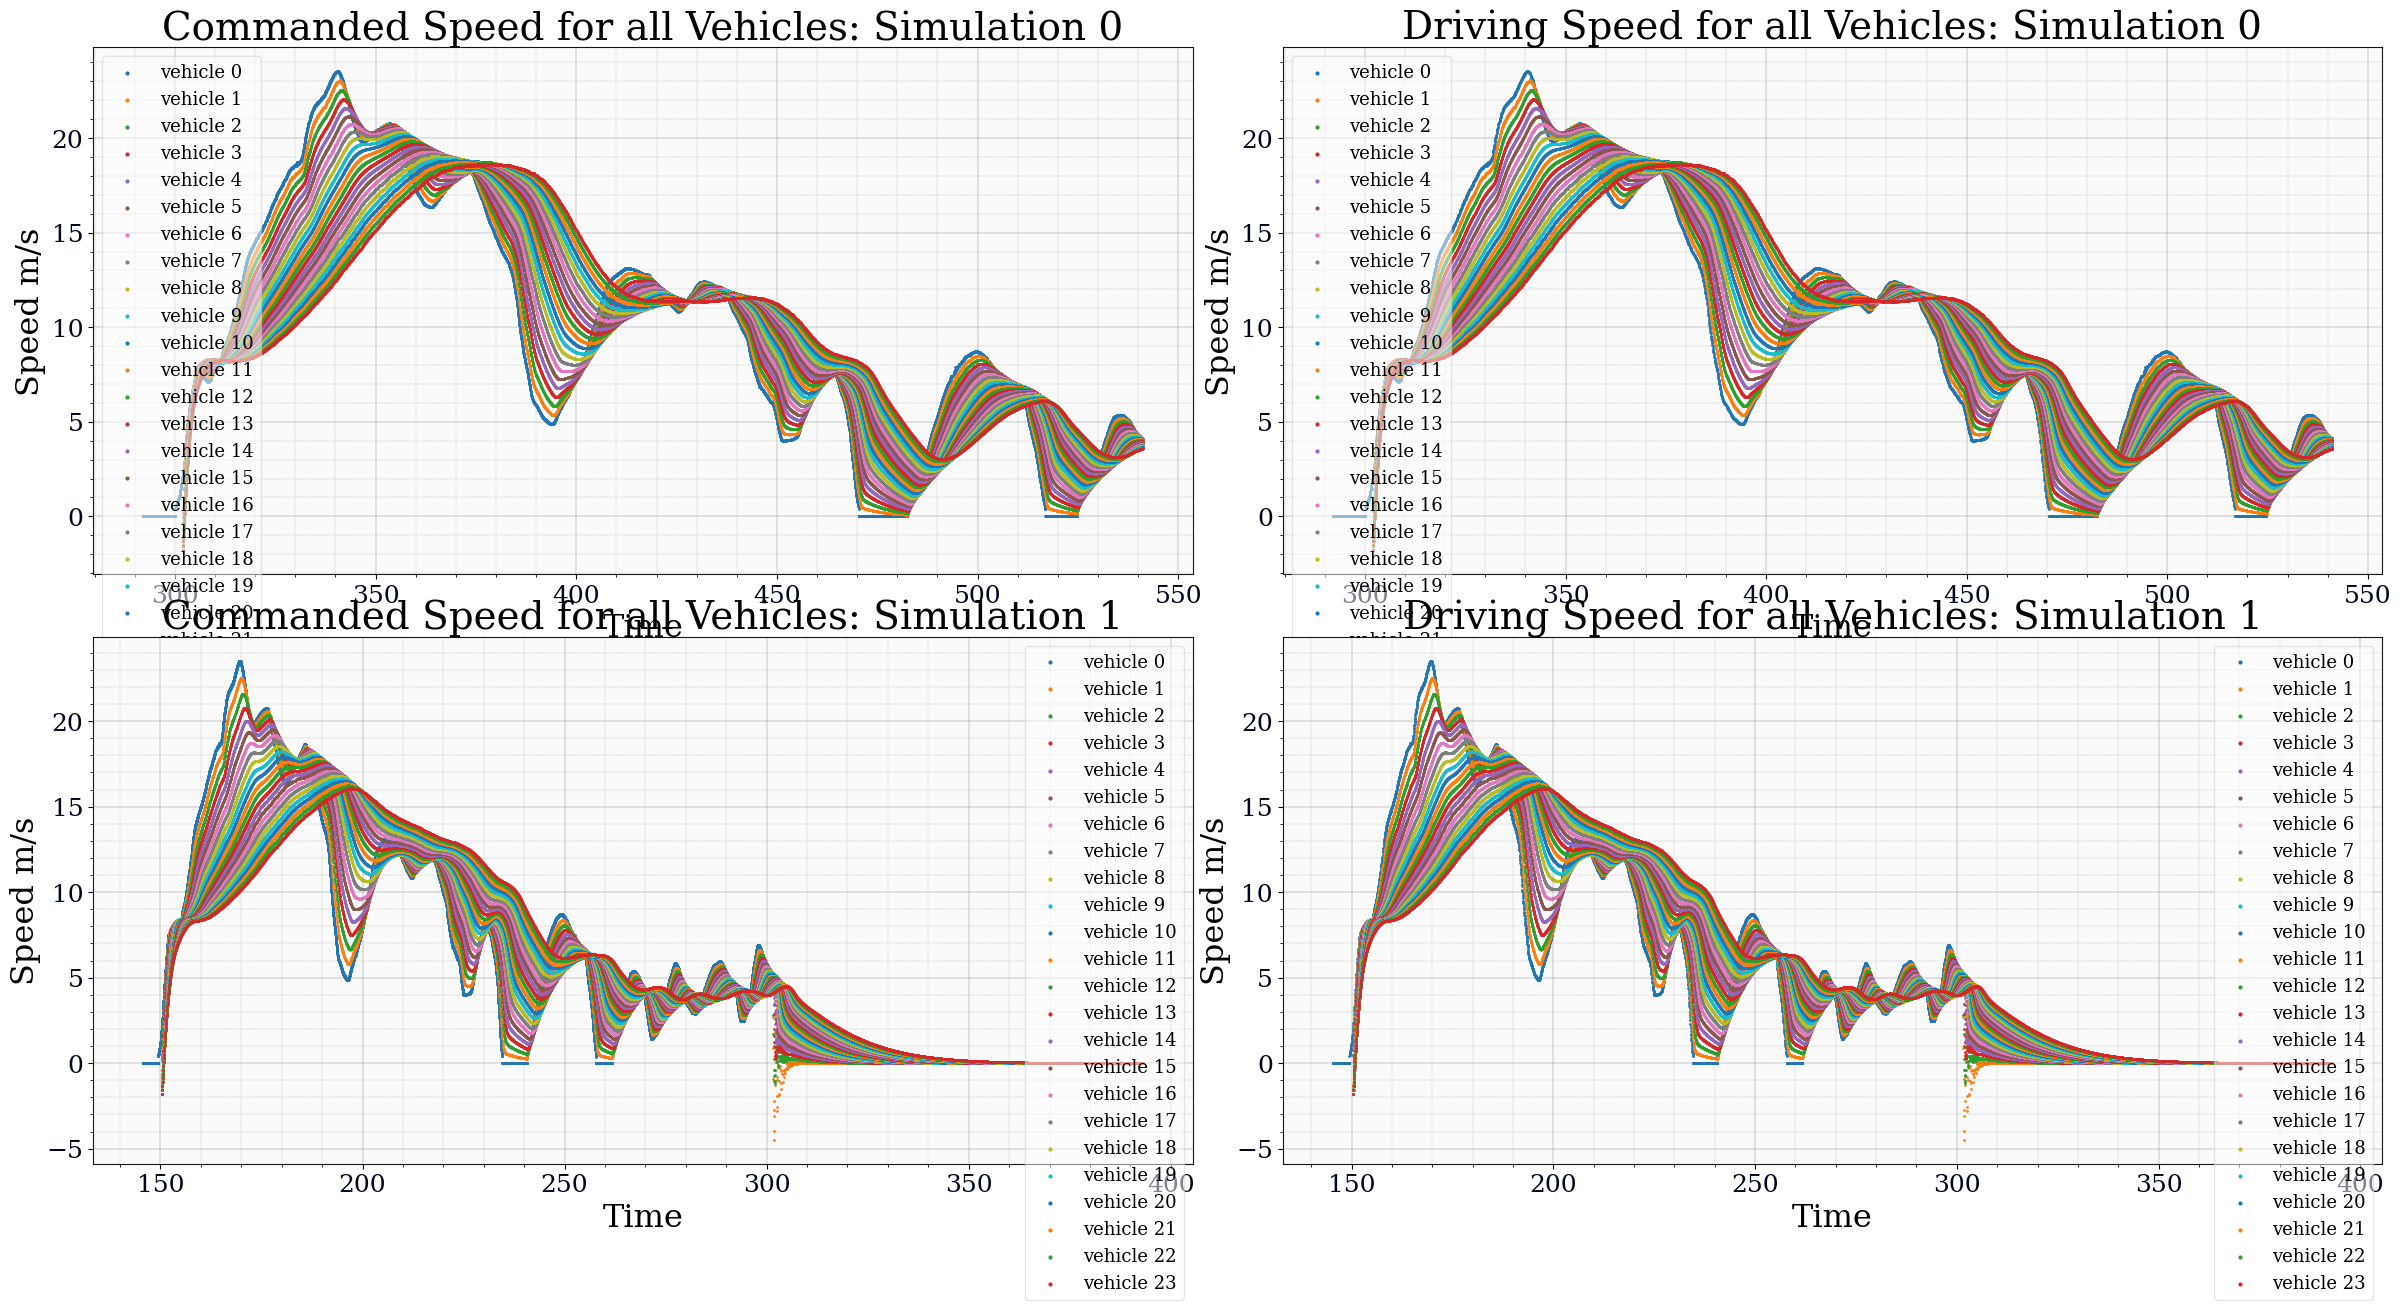

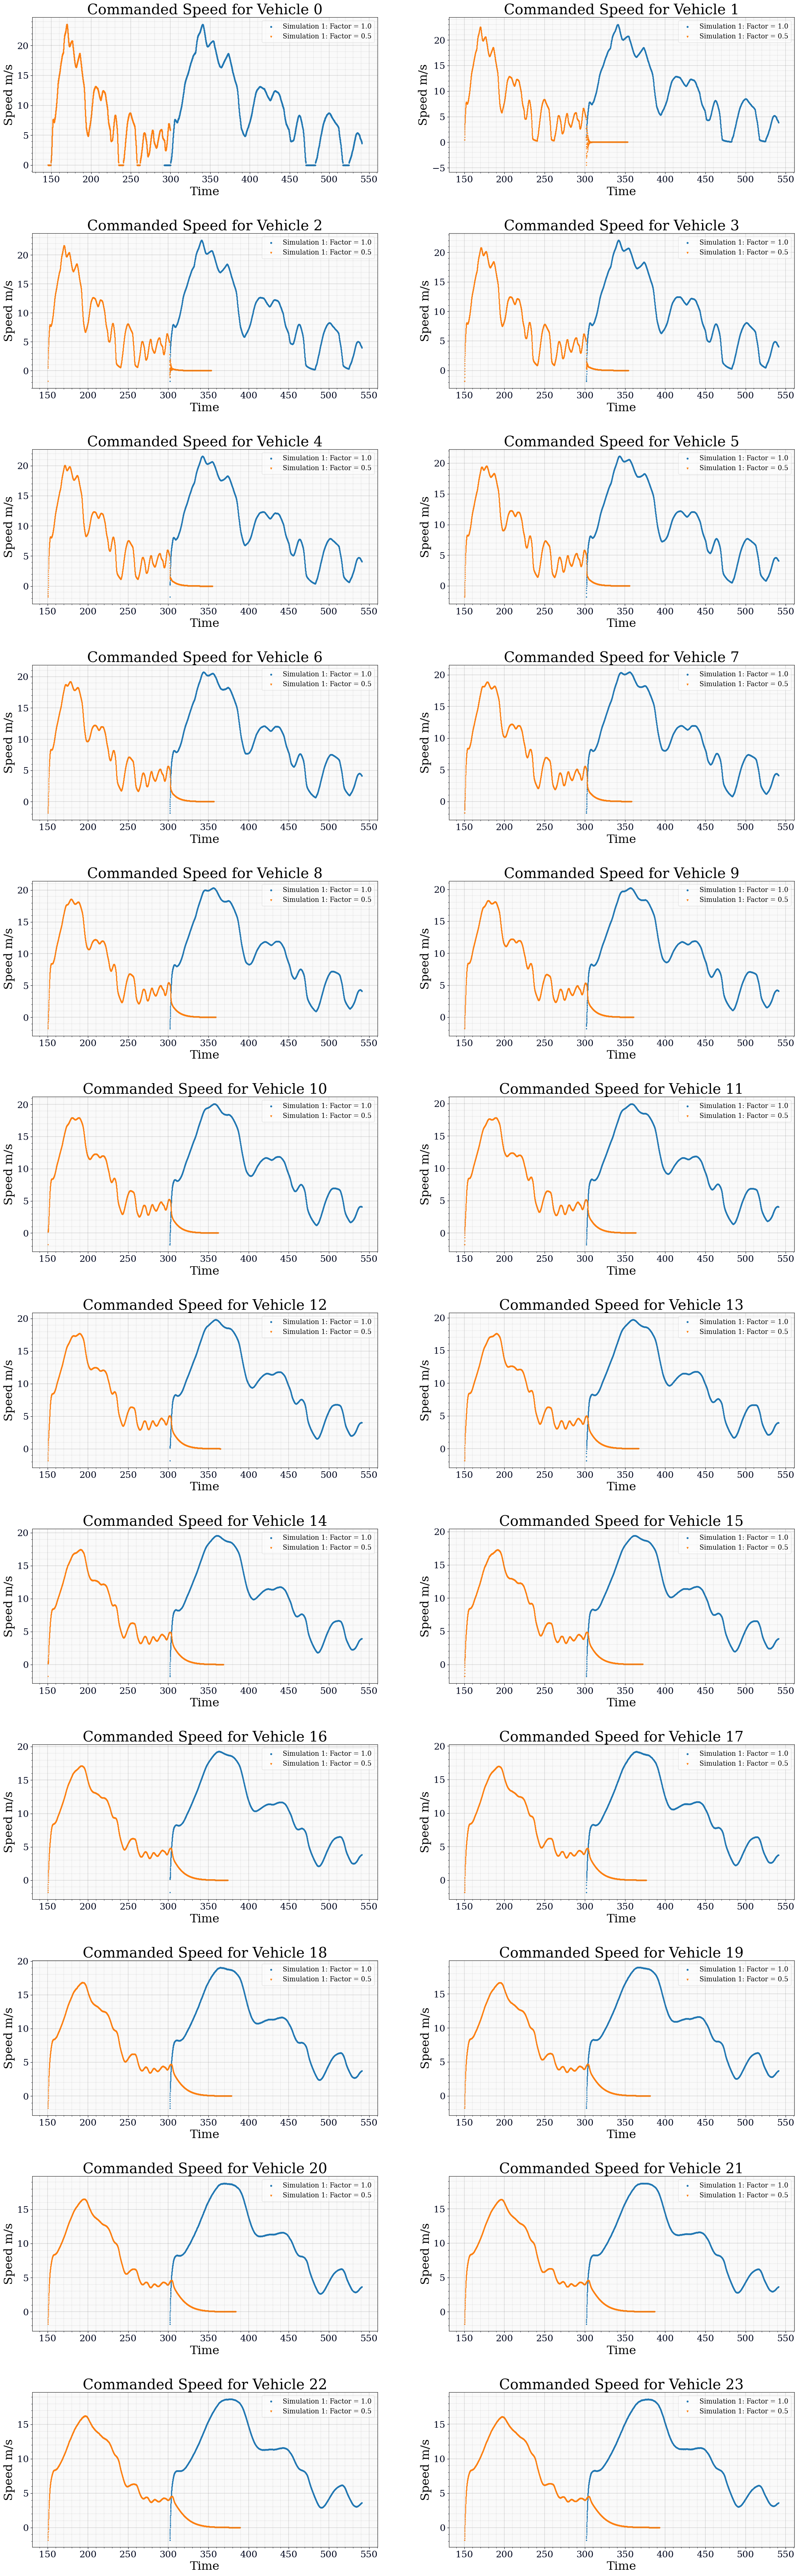

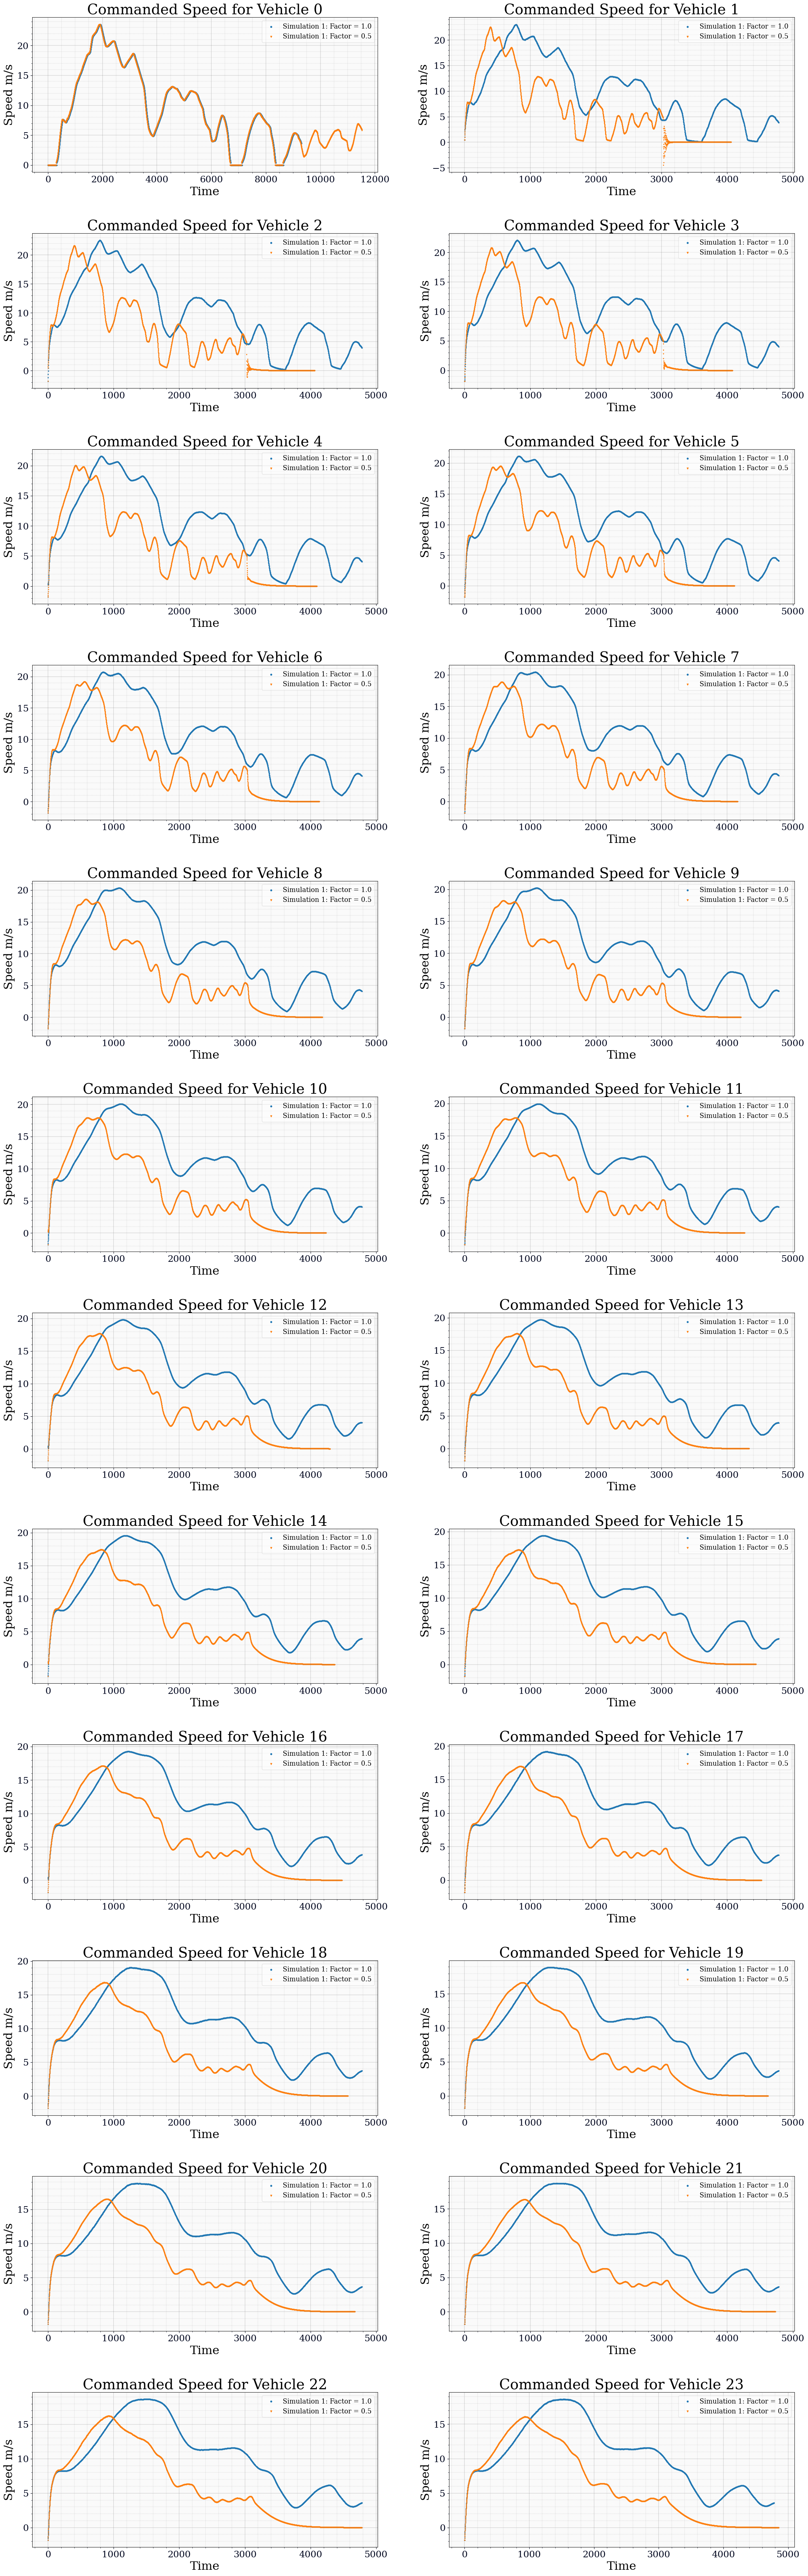

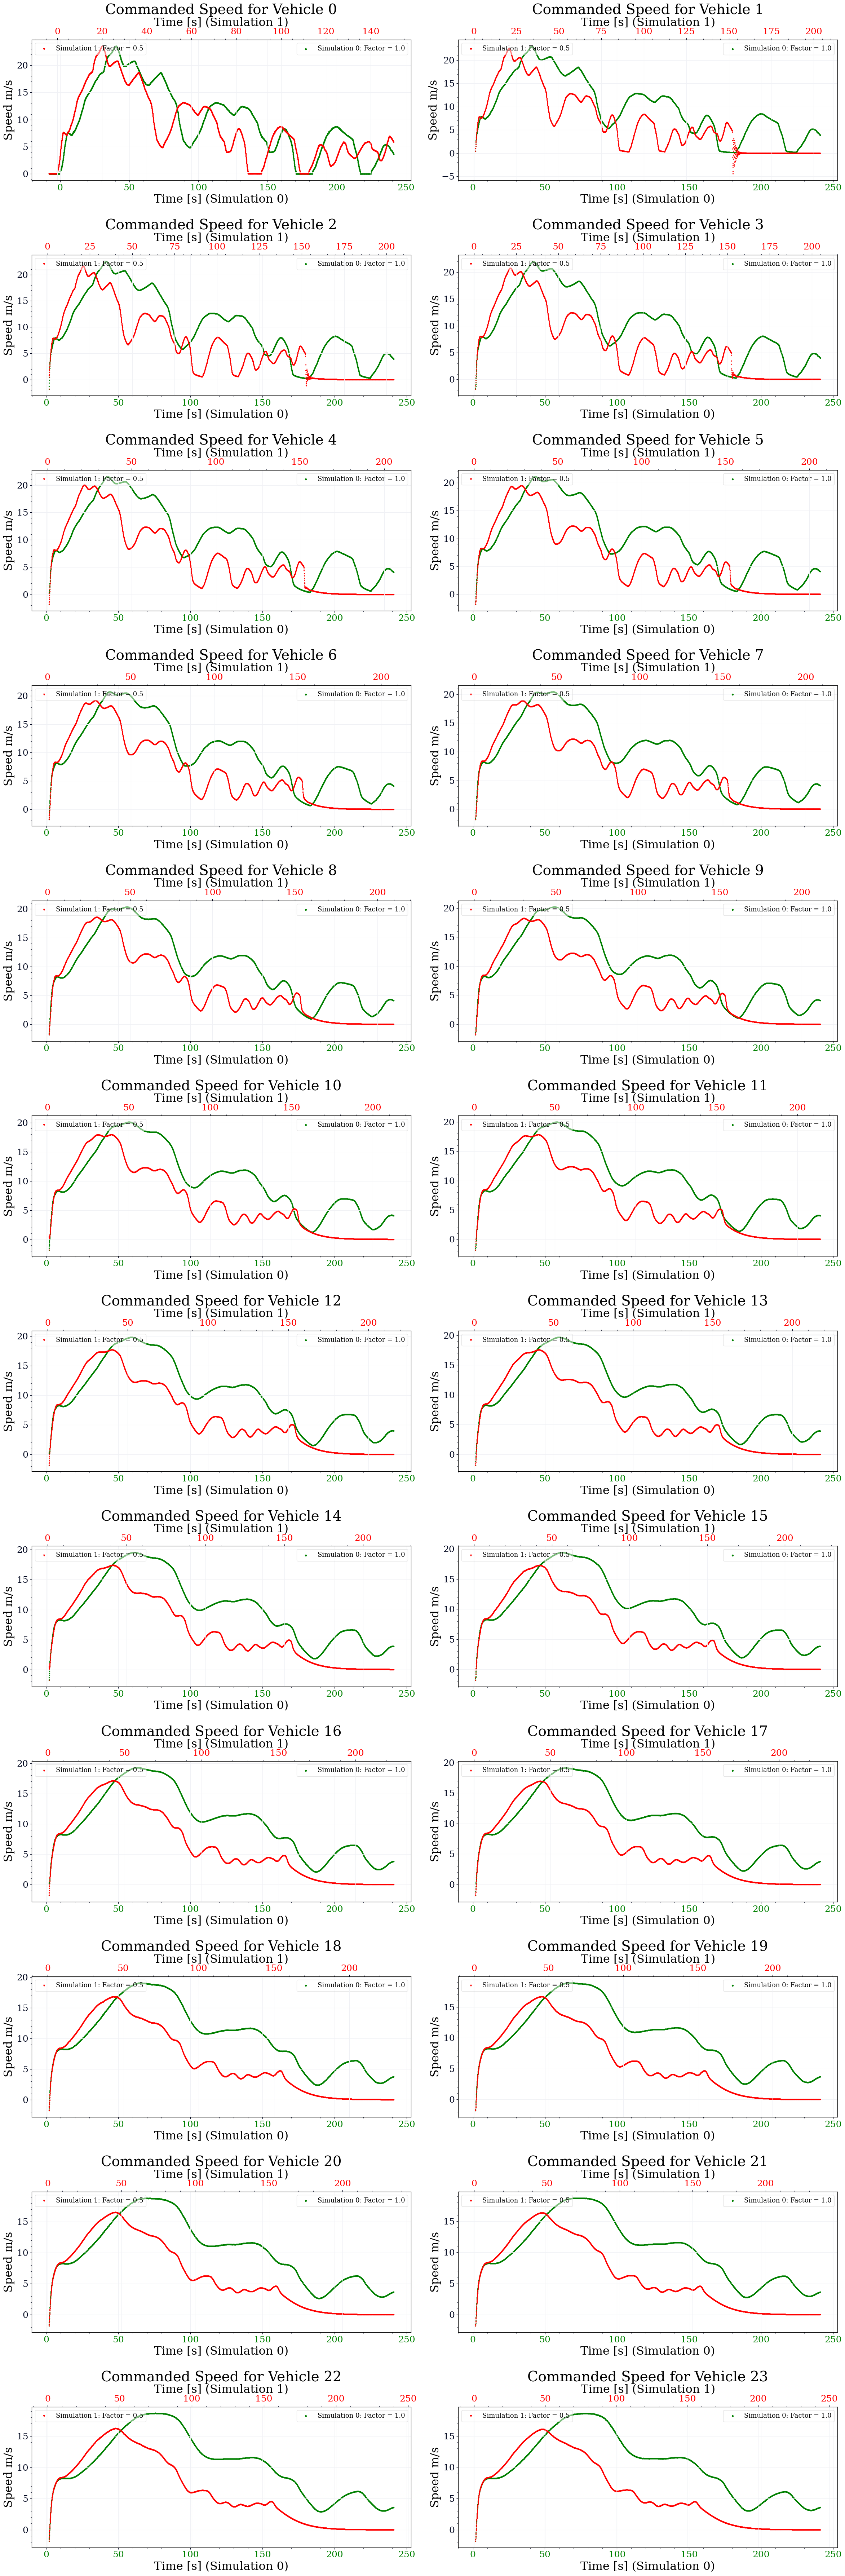

In [3]:
#!/usr/bin/env python

# Author: Rahul Bhadani

import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time

dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')

# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

bagfiles = []


# no gui sparkle
# bagfiles.append('/home/refulgent/Cyverse/sparkle/sparkle_n_24_clock_rate_100_clockfactor_0.2_recordtime_400.0_2021-11-22-00-48-14.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/sparkle_n_24_clock_rate_100_clockfactor_1.0_recordtime_400.0_2021-11-22-19-37-45.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/sparkle_n_24_clock_rate_100_clockfactor_0.5_recordtime_400.0_2021-11-22-01-04-52.bag')

n_cars = 24
Blist = []
for bf in bagfiles:
    B = bagreader(bf)
    Blist.append(B)
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, n_cars):
            # print(i)
            cmdvel_file = B.message_by_topic('/sparkle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/sparkle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/sparkle_{:03d}/setvel'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))
        
fig.show()
#fig.savefig("persimulationplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

def scale_time(time_vector, scale = 2.0):
    """
    
    """
    if scale == 1.0:
        return time_vector
    diff = np.diff(time_vector)
    new_time = []
    new_time.append(time_vector[0])

    for i, d in enumerate(diff):
        t_next = new_time[i]  + d*scale
        new_time.append(t_next)

    return new_time

# overlaid plot
fig, ax = bagpy.create_fig(ncols = 2, nrows = int(np.ceil(n_cars/2)))

# p = [0]    
# for k in range(1, len(cmd_speed)):
#     p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
#     p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    # print('Vehicle: {}'.format(j))
    p = [0, 0.0]
    #scale = [1.0, 2.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    # lb = [  'Simulation 1: RTF=0.5 MaxupdateRate = 50.0, time_step = 0.01', \
    #         'Simulation 1: RTF=0.25 MaxupdateRate = 25.0, time_step = 0.01',\
    #         'Simulation 1: RTF=0.25 MaxupdateRate = 50.0, time_step = 0.005']
    
    lb = [  'Simulation 1: Factor = 1.0', \
            'Simulation 1: Factor = 0.5']

    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        #new_time = scale_time(time, scale[k])
        #cmd_speed[k][j]['Time'] = new_time
        #ax[j].scatter(x = cmd_speed[k][j]['Time'] - p[k] , y = cmd_speed[k][j]['linear.x']  ,  s = 2, label = 'simulation#_{}'.format(k))
        #ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) + p[k], y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
        ax[j].scatter(x= cmd_speed[k][j]['Time'] + p[k], y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
    

    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))
    fig.show()


fig, ax = bagpy.create_fig(ncols = 2, nrows = int(np.ceil(n_cars/2)))
for j in range(0, len(cmd_speed[0])):
    p = [0, 0.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]    
    lb = [  'Simulation 1: Factor = 1.0', \
            'Simulation 1: Factor = 0.5']

    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) + p[k], y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
        

    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))
    fig.show()
    

B0 = Blist[0]
clock_file = B0.message_by_topic('/clock')
clock_df1 = pd.read_csv(clock_file)
clock_df1['Total_Time'] = clock_df1['clock.secs'] + clock_df1['clock.nsecs']*1e-9
clock_df1['Tdiff'] =clock_df1['Total_Time'].diff()

B1 = Blist[1]
clock_file = B1.message_by_topic('/clock')
clock_df2 = pd.read_csv(clock_file)
clock_df2['Total_Time'] = clock_df2['clock.secs'] + clock_df2['clock.nsecs']*1e-9
clock_df2['Tdiff'] =clock_df2['Total_Time'].diff()


# overlaid plot
fig, ax = plt.subplots(int(np.ceil(n_cars/2)), 2)
ax = ax.ravel()
for j in range(0, len(cmd_speed[0])):
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    lb = [  'Simulation 0: Factor = 1.0', \
            'Simulation 1: Factor = 0.5']

    ax2 = ax[j].twiny()
    axx = [ax[j], ax2]

    color =['green', 'red']
    legend_loc = ['upper right', 'upper left']
    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()

        t0 = cmd_speed[k][0][cmd_speed[k][0]['linear.x'] > 0].iloc[0]['Time']
        axx[k].scatter(x= cmd_speed[k][j]['Time'] - t0, y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k], c=color[k])

        axx[k].grid(True)

        axx[k].tick_params(axis='x', labelcolor=color[k])
    

        axx[k].legend(loc=legend_loc[k])
        axx[k].set_xlabel('Time [s] (Simulation {})'.format(k))

    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))
    fig.tight_layout() 
    fig.show()